# Task 1 - Analysis on ML Test Scores

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the data
df = pd.read_csv("scores_data.csv")
df.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2      Score     149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


,Batch,User_ID,Score
count,149,149,149
unique,3,149,8
top,AI_ELITE_7,uid_149,4 / 7
freq,53,1,40


In [4]:
df.columns = df.columns.str.strip()
df.columns

Index(['Batch', 'User_ID', 'Score'], dtype='object')

In [5]:
df["Score"]= df["Score"].str.split("/").apply(lambda x:int(x[0])/int(x[1])*100)

In [6]:
df["Score"].head()
df["Score"].dtype

dtype('float64')

In [7]:
df["Result"] = df["Score"].apply(lambda x: "Pass" if x >= 80 else "Fail")

In [8]:
df["Result"].value_counts()
df["Score"].describe()

count    149.000000
mean      62.607862
std       22.745705
min        0.000000
25%       42.857143
50%       57.142857
75%       71.428571
max      100.000000
Name: Score, dtype: float64

In [9]:
pass_percentage = (df["Result"] == "Pass").mean() * 100
pass_percentage

24.161073825503358

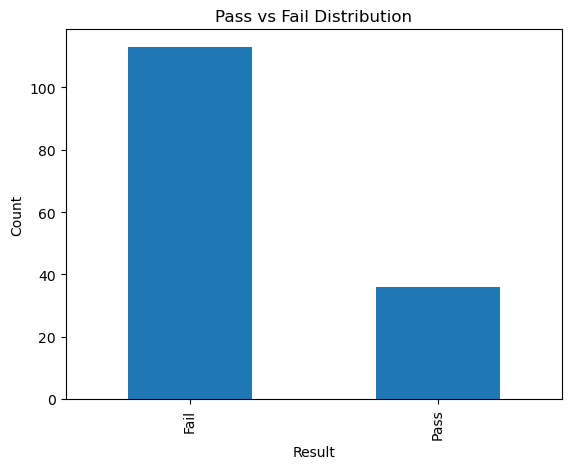

In [10]:
df["Result"].value_counts().plot(kind="bar")
plt.title("Pass vs Fail Distribution")
plt.xlabel("Result")
plt.ylabel("Count")
plt.show()

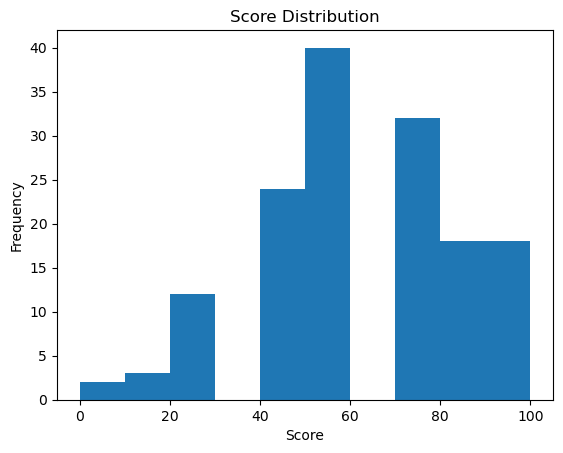

In [11]:
df["Score"].plot(kind="hist", bins=10)
plt.title("Score Distribution")
plt.xlabel("Score")
plt.show()

In [12]:
df.groupby("Batch")["Score"].describe()

,count,mean,std,min,25%,50%,75%,max
Batch,,,,,,,,
AI_ELITE_4,48.0,54.166667,20.619652,0.000000,42.857143,57.142857,60.714286,100.0
AI_ELITE_6,48.0,60.416667,23.434869,0.000000,42.857143,57.142857,71.428571,100.0
AI_ELITE_7,53.0,72.237197,20.666883,28.571429,57.142857,71.428571,85.714286,100.0


In [13]:
df.groupby("Batch")["Result"].value_counts()

Batch       Result
AI_ELITE_4  Fail      44
            Pass       4
AI_ELITE_6  Fail      39
            Pass       9
AI_ELITE_7  Fail      30
            Pass      23
Name: count, dtype: int64

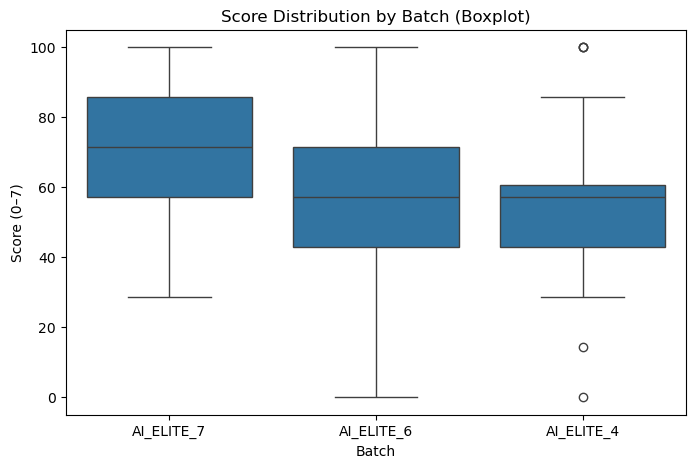

In [15]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Batch", y="Score")
plt.title("Score Distribution by Batch (Boxplot)")
plt.xlabel("Batch")
plt.ylabel("Score (0–7)")
plt.show()

# Conclusion:
The analysis reveals that student performance varies across batches. AI_ELITE_4 demonstrates strong overall results, while AI_ELITE_6 and AI_ELITE_7 show comparatively weaker performance with higher failure rates. Batch-specific insights can help instructors identify areas where targeted guidance and mentoring are required to improve outcomes.